# Lab 3: Linear Regression

## Task 1. Mystery Data 1

### 1a) Import the data

1. Import data 'data/mystery_data_1.csv' (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b) Using the following links and MatPlotLib documentation to view the data:
- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    1. Two historgrams one for the X data and the other for the Y data.
    2. Create the histograms with 10 bins.
    3. Include a title for each subplot.

First 10 rows:

[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]

-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------



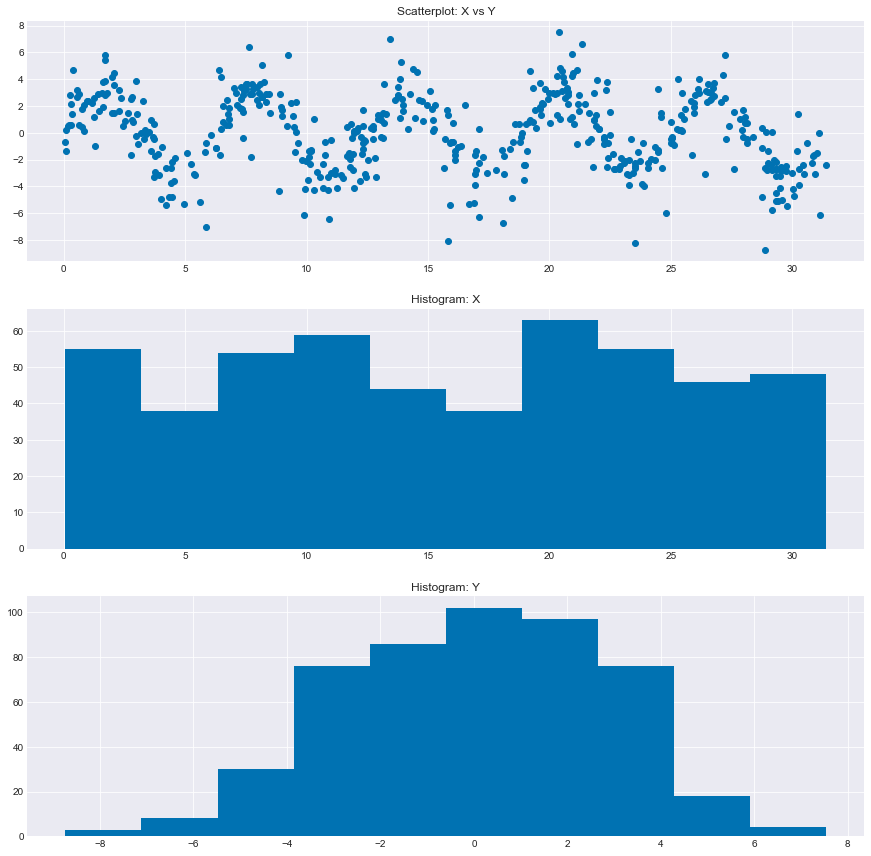

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams["figure.figsize"] = [12,4.5]


#Import mystery_data
mystery_csv = np.genfromtxt("data/mystery_data_1.csv", delimiter = ',')

mystery_csv = mystery_csv[2:]

print('First 10 rows:\n')

print(mystery_csv[:10])


fig, ax = plt.subplots(3,1, figsize = (15,15))

#Task 1
#Scatterplot X vs Y
ax[0].scatter(mystery_csv[:,0],mystery_csv[:,1])
ax[0].set_title("Scatterplot: X vs Y")


#Task 2 and 3
#Histograms X and Y with 10 bins
ax[1].hist(mystery_csv[:,0], bins = 10)
ax[1].set_title("Histogram: X")

ax[2].hist(mystery_csv[:,1], bins = 10)
ax[2].set_title("Histogram: Y")


print('''
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')

## Task 2. Analyze Mystery Data 1

### 2a) Use scipy to calculate the linear regression for Mystery Data 1 

1. Print first 10 lines rows of data.
2. Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
    1. The x column is the left hand side array and the y column is the right hand side array.
    2. This includes adding homogeneous coordinates (for the intercept) to the A matrix. 
    3. Useful methods: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
3. Print the least-squares solution and residual
4. Using the residual, calculate and print the $R^2$ value
    1. $R^2 = 1 - \frac{residues}{smd}$
    2. The square mean deviation: $smd = \sum (y - \frac{\sum y}{n} )^2$

In [3]:
from scipy.linalg import lstsq

#Task 1
print("First 10 rows of data:\n", mystery_csv[:10], '\n')

#Task 2
A = mystery_csv[:,0]
y = mystery_csv[:,1]     
Ahat = np.hstack( (A.reshape((A.shape[0],1)), np.ones((A.shape[0],1))) )

#Task 3
c, _, _, _ = lstsq( Ahat, y)

print('c:', c, '\n')

#Residuals
resid = y - Ahat @ c

#Sum of squared residuals
residuals = np.sum(np.abs(resid**2))

print('residuals(sum of squared residuals):', residuals, '\n')


#Confirm mean squared error and residuals.

#Squared Mean Deviation
SMD = np.sum((y - np.mean(y))**2)

#R2
R2 = 1 - residuals/SMD
                                   
print('R2:', R2, '\n')


print('''
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [-0.05650709  0.92884793]

residuals: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')

First 10 rows of data:
 [[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]] 

c: [-0.05650709  0.92884793] 

residuals(sum of squared residuals): 3722.8001542015754 

R2: 0.033824411486558126 


-----------------------------------
Your results should look like this:
----------------------------------- 
c: [-0.05650709  0.92884793]

residuals: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------



### 2b) Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope (first weight) and add the intercept (second weight)
3. Include a title (with $R^2$ value), legend, x label and y label

(100,)
(100,)


Text(0, 0.5, 'y')

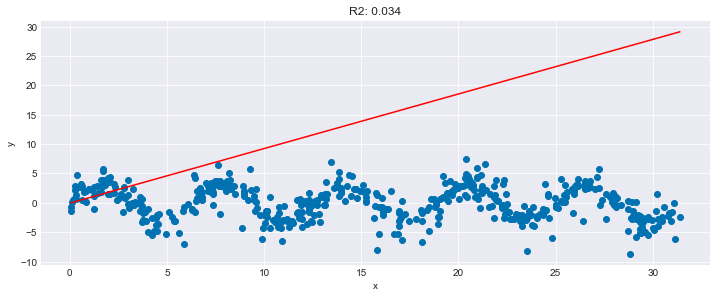

In [6]:
#Independent variable
xline = np.linspace( A.min(), A.max(), num = 100)

print(np.shape(xline))

#Regression line: c[0] --> intercept, c[1] --> slope
rline = c[0] + c[1]*xline

print(np.shape(rline))

#Scatter plot
plt.scatter( A, y,)
#Plot regression line
plt.plot( xline, rline, 'r')
#Title, xlabel, ylabel
plt.title(f"R2: {R2:.3f}")
plt.xlabel('x')
plt.ylabel('y')



### 2c)  Interpret the results of the linear regression of the dataset 

Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? Why?

**The low R-squared value indicates that the explanatory variable explains only 3.4% of the variance in the response variable in this model. The slope of the line indicates a strong positive correlation between the dependent and independent variable. However, linear regression is not a good model for this data because there's a clear non-linear relationship between the dependent variable and the independent variable.**